# 3 Data integration in a single matrix (Infected)
#### Dataset1: Healthy - Arabidopsis (Col-0)

Cynthia Soto <br>
Fecha: 20 de Octubre 2020 <br>
Datatype representation: normalized values in log2 scale (genome name reference) <br>
Data quantify with HTSeq (alignments done with STAR SA)  <br>

Data quantifications produced with HTSeq are absolute counts. <br>
First data needed to be cleaned and transformed to a log2 scale. <br>
Now data-frames from the same reference-organims are going to be integrate in a single data matrix <br>

**Workflow:** <br>
1) Data assummed to be cleaned & in the same scale. (in this dataset is Log2) <br>
2) Gene_name is used as key to merge the n dataframes and retrieve the Log2 column of each dataset  <br> 
3) Some basic statistics are build from the single matrix.  <br>
4) A soft trimming based on ceros across all samples is performed.  <br>


Pandas provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In addition, pandas also provides utilities to compare two Series or DataFrame and summarize their differences.

Letś to merge DataFrames on specific keys by different join logics like left-join, inner-join, etc.

In [9]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts


## Integration to all cvs data files (samples) in one matrix 

In [11]:
## CREATE A SINGLE MATRIX 

all_files = glob.glob(s_path)
## To load the main df
flag_b=True

for file in all_files:
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]
    #print(x1)
    
    if flag_b:    ## load main df once
        #print(file)
        ## Main df is df1
        df1=pd.read_csv(file, sep='\t', usecols=[1,3])    ## nrows=100, 
        ## remove unnamed cols
        df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
        df1.rename(columns={'log2_value':x1},inplace=True)
        #print(df1) 
        flag_b=False
    else:
        #print(file)
        df2= pd.read_csv(file, sep='\t', usecols=[1,3])     ## nrows=100, 
        ## remove unnamed cols
        df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)      
        ## compare matrix gene_names before concatenated
        comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
        if (False in comparison_column):
            print("Gene_names are not the same. Matrix "+file+" will not be concatenated.")
        else:
            ## merge matrix based in column name "Genes"
            df2.rename(columns={'log2_value':x1},inplace=True)
            df1=df1.merge(df2,on=['Genes'],how='left')
        
    ## Send the concatenated matrix to all_Log2.csv for a statistical further analysis
    df1.to_csv('all_samples_log2.csv', sep='\t', index=True)

In [12]:
df1

,Genes,SRR364399,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
0,AT1G01010,6.930737,3.000000,5.614710,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515
1,AT1G01020,6.727920,5.129283,5.357552,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196
2,AT1G01030,3.584963,4.459432,5.087463,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432
3,AT1G01040,9.262095,6.228819,5.857981,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781
4,AT1G01050,7.954196,4.700440,4.247928,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27650,ATMG01350,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.584963,1.584963,2.807355,3.459432
27651,ATMG01360,8.778077,5.000000,5.584963,5.247928,5.087463,4.321928,4.000000,4.643856,5.044394,7.238405,7.507795,8.661778
27652,ATMG01370,7.714246,3.906891,2.000000,4.857981,5.044394,4.954196,4.754888,4.087463,4.954196,7.285402,7.118941,7.700440
27653,ATMG01400,2.807355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000


## Some statistic onto the unique matrix

1) Gene expression cvs files are integreted in one matrix<br>
2) Gene ID with cero counts in expression across all the samples are got it<br>
3) Gene IDs identifiers are dropped from the the sample df(s) to compose the dataset2. <br>

In [14]:
#Check number of zeros by sample
df1.isin([0]).sum()

Genes                0
SRR364399         7090
SRR6283148       10866
SRR6283147       10600
SRR3383696        7518
SRR3383780        7549
SRR10586397pe     5627
SRR10586399pe     5703
SRR3383779        7719
SRR3383697        7375
SRR364390         7229
SRR364389         7164
SRR364398         7117
dtype: int64

In [15]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
#print(s_zeros)
#type(s_zeros)    ### build a serie-pandas
## Desglozando la formula
#(df1 == 0)
#(df1 == 0).astype(int)
#(df1 == 0).sum(axis=1)

## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the integrated matrix to all_log2_counter_cero.csv 
df1.to_csv('all_log2_counter_cero.csv', sep='\t', index=True)

In [18]:
## Filter for looking rows with x number of ceros
is_zero = (df1['zero-counter']>=12)     
df1_12 = df1[is_zero]
print(df1_12.shape)
print(df1_12.head(7))
## Send the integrated matrix to all_log2_counter_cero.csv 
df1_12.to_csv('all_log2_12_ceros.csv', sep='\t', index=True)

(3618, 14)
         Genes  SRR364399  SRR6283148  SRR6283147  SRR3383696  SRR3383780  \
33   AT1G01335        0.0         0.0         0.0         0.0         0.0   
42   AT1G01410        0.0         0.0         0.0         0.0         0.0   
110  AT1G02067        0.0         0.0         0.0         0.0         0.0   
126  AT1G02210        0.0         0.0         0.0         0.0         0.0   
156  AT1G02490        0.0         0.0         0.0         0.0         0.0   
161  AT1G02540        0.0         0.0         0.0         0.0         0.0   
162  AT1G02550        0.0         0.0         0.0         0.0         0.0   

     SRR10586397pe  SRR10586399pe  SRR3383779  SRR3383697  SRR364390  \
33             0.0            0.0         0.0         0.0        0.0   
42             0.0            0.0         0.0         0.0        0.0   
110            0.0            0.0         0.0         0.0        0.0   
126            0.0            0.0         0.0         0.0        0.0   
156         

In [19]:
df1_12.isin([0]).sum()

Genes               0
SRR364399        3618
SRR6283148       3618
SRR6283147       3618
SRR3383696       3618
SRR3383780       3618
SRR10586397pe    3618
SRR10586399pe    3618
SRR3383779       3618
SRR3383697       3618
SRR364390        3618
SRR364389        3618
SRR364398        3618
zero-counter        0
dtype: int64

## Does a soft trimming of data

**First, I drop identified genes with ceros across all the samples** <br>
1) All data are cleaned and normalized to log2<br>
2) First soft trimming: remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 8 muestras, entonces 8 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo expresión de ese gen para ninguna de las muestra. <br>
x =   es Si  -1


In [24]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_12['Genes'])

with open("all_genesIDs_cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [25]:
genes_cero_ToList
len(genes_cero_ToList)

3618

In [26]:
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_12.index)
print(lst_genes_to_drop)

Int64Index([   33,    42,   110,   126,   156,   161,   162,   165,   167,
              179,
            ...
            27624, 27630, 27631, 27633, 27636, 27638, 27639, 27642, 27645,
            27647],
           dtype='int64', length=3618)


In [27]:
df1.head(35)     ## see idx=33 full of zeros

,Genes,SRR364399,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398,zero-counter
0,AT1G01010,6.930737,3.000000,5.614710,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515,0
1,AT1G01020,6.727920,5.129283,5.357552,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196,0
2,AT1G01030,3.584963,4.459432,5.087463,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432,0
3,AT1G01040,9.262095,6.228819,5.857981,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781,0
4,AT1G01050,7.954196,4.700440,4.247928,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808,0
5,AT1G01060,9.016808,1.584963,2.000000,9.642052,13.728665,6.686501,7.098032,13.420092,10.048487,7.366322,7.467606,8.933691,0
6,AT1G01070,6.523562,3.321928,2.321928,6.491853,6.599913,7.055282,6.807355,5.781360,6.768184,6.000000,6.475733,6.599913,0
7,AT1G01080,7.011227,5.700440,6.087463,10.421013,9.485829,9.523562,9.310613,9.233620,10.630267,8.118941,8.082149,7.294621,0
8,AT1G01090,9.197217,8.581201,8.668885,10.417853,10.787086,11.240791,11.102632,10.422065,10.658211,9.726218,9.640245,9.330917,0
9,AT1G01100,9.243174,6.741467,6.569856,9.596190,10.265615,10.497852,10.323055,9.324181,9.802516,9.754888,9.771489,9.243174,0


In [28]:
print(df1.shape)
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df1 = df1.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

(27655, 14)


In [29]:
print(df1.shape)
df1.head()

(24037, 14)


,Genes,SRR364399,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398,zero-counter
0,AT1G01010,6.930737,3.000000,5.614710,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515,0
1,AT1G01020,6.727920,5.129283,5.357552,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196,0
2,AT1G01030,3.584963,4.459432,5.087463,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432,0
3,AT1G01040,9.262095,6.228819,5.857981,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781,0
4,AT1G01050,7.954196,4.700440,4.247928,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808,0


In [31]:
df1.to_csv('all_log2_dropped12ceros.csv', sep='\t', index=True)

## Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [33]:
# load file to plot and format df to be plotted 

#print(os.listdir(os.getcwd()))
df_nozeros=pd.read_csv("all_log2_dropped12ceros.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head())

## Get sample list names
sample_lst=df_nozeros.columns
print(sample_lst)

   SRR364399  SRR6283148  SRR6283147  SRR3383696  SRR3383780  SRR10586397pe  \
0   6.930737    3.000000    5.614710    6.539159    7.044394       8.577429   
1   6.727920    5.129283    5.357552    7.149747    7.400879       7.228819   
2   3.584963    4.459432    5.087463    2.807355    4.523562       5.727920   
3   9.262095    6.228819    5.857981   10.047124   10.251482      10.167418   
4   7.954196    4.700440    4.247928   10.284246    9.768184       9.967226   

   SRR10586399pe  SRR3383779  SRR3383697  SRR364390  SRR364389  SRR364398  
0       8.607330    6.044394    6.988685   6.965784   6.977280   6.942515  
1       7.139551    6.918863    7.375039   7.467606   7.330917   6.954196  
2       5.906891    4.321928    4.392317   3.169925   3.169925   3.459432  
3      10.200899    9.812177   10.382624   9.743151   9.842350   9.303781  
4       9.744834    9.481799   10.651949   8.689998   8.774787   8.016808  
Index(['SRR364399', 'SRR6283148', 'SRR6283147', 'SRR3383696', 'SRR338

Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

In [ ]:


**************** Aqui voy ****************************



## Retrieve meta-data for label leyends with more sense
file='athal2_metadata.csv'

In [38]:
print(str(os.getcwd()))
lst_header=["sample","fungus","hpi","ID_sample","good"] 
file='~/Proyectos/athal2_stats/metadata.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
print(df_meta.index)
print(df_meta)
## filter the ID sample
is_sample =  df_meta['sample']=='SRR364399'
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample


/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts
RangeIndex(start=0, stop=20, step=1)
           sample       ID
0      SRR3383696     Bc12
1      SRR3383697     Bc12
2      SRR3383779     Bc18
3      SRR3383780     Bc18
4   SRR10586397pe     Bc24
5   SRR10586399pe     Bc24
6       SRR364389     Ch22
7       SRR364390     Ch22
8       SRR364398     Ch40
9       SRR364399     Ch40
10     SRR6283147     Ss30
11     SRR6283148     Ss30
12    SRR3383640   healthy
13     SRR3383641  healthy
14    SRR3383782   healthy
15     SRR3383783  healthy
16    SRR3383821   healthy
17     SRR3383822  healthy
18    SRR6283144   healthy
19     SRR6283145  healthy


'Ch40'

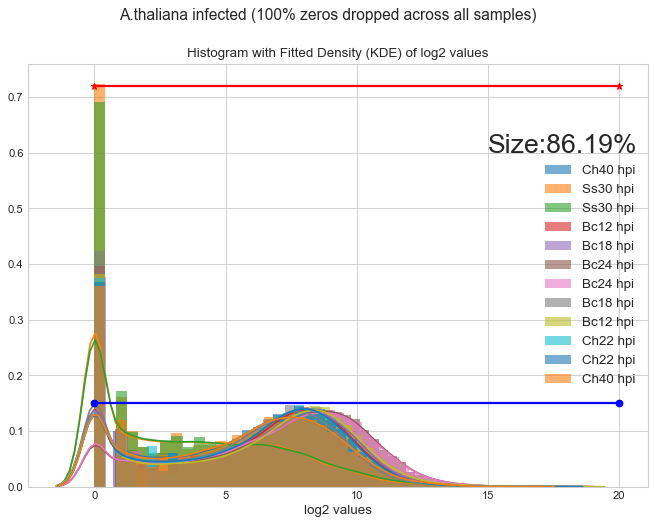

In [75]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of log2 values',fontsize=12);
plt.xlabel('log2 values',fontsize=12);
plt.suptitle("A.thaliana infected (100% zeros dropped across all samples)", fontsize=14)
## add arbitrary lines to canvas
plt.plot([0, 20], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 20], [.72, .72], 'k-', lw=2, color='red',marker = '*')
plt.text(15, 0.6, "Size:86.19%",fontsize=24)
plt.legend(fontsize=12);
#plt.savefig("../athal1_stats/all_fitted density_drop12zeros.png");

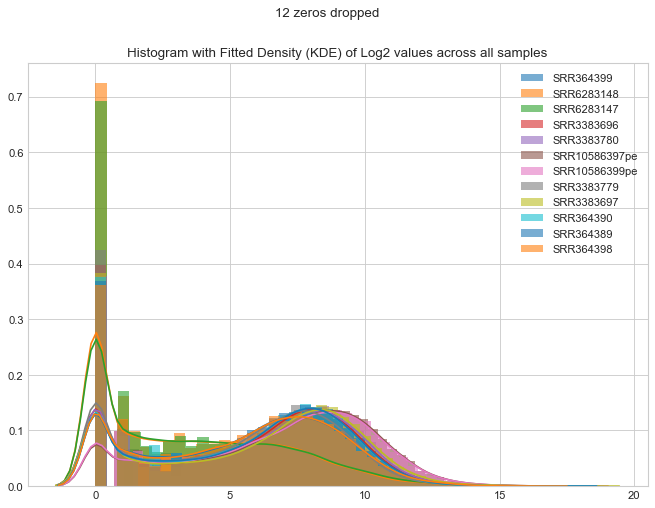

In [42]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:

    #print(file)
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("12 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop12zeros.png");

### Addtional trimming of IDs  (drop 7 zeros across samples)

In [93]:
## Filter for looking rows with x number of ceros (second parse)
## Take the lastet dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped8ceros.csv", sep='\t')
is_zero7 = (df_nozeros['zero-counter']>=7)     
#print(is_zero7)
df1_7 = df_nozeros[is_zero7]
print(" Match records: "+ str(df1_7.shape))
print(df1_7)

## Send the integrated matrix 
df1_7.to_csv('all_log2_7_ceros.csv', sep='\t', index=True)

 Match records: (950, 11)
       Unnamed: 0      Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  \
14             14  AT1G01150    0.000000         0.0         1.0    0.000000   
102           109  AT1G02065    0.000000         0.0         0.0    2.000000   
120           129  AT1G02250    2.807355         0.0         0.0    0.000000   
146           156  AT1G02490    1.000000         0.0         0.0    0.000000   
151           164  AT1G02570    0.000000         0.0         0.0    0.000000   
...           ...        ...         ...         ...         ...         ...   
22409       27627  ATMG01110    0.000000         0.0         0.0    1.000000   
22415       27639  ATMG01240    0.000000         0.0         0.0    0.000000   
22416       27640  ATMG01250    0.000000         0.0         0.0    0.000000   
22417       27641  ATMG01260    0.000000         0.0         0.0    2.000000   
22418       27643  ATMG01275    0.000000         0.0         0.0    1.584963   

       SRR338

In [94]:
df1_7.isin([0]).sum()

Unnamed: 0        0
Genes             0
SRR3383640      846
SRR3383821      843
SRR3383782      778
SRR6283145      806
SRR3383641      793
SRR3383783      872
SRR3383822      871
SRR6283144      841
zero-counter      0
dtype: int64

In [95]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_7['Genes'])

with open("all_genesIDs_7cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [96]:
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_7.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped7ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (22427, 11)
New dimensions:  (21477, 11)


### Plot again to see the new distribution

In [97]:
## sample names
sample_lst

Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')

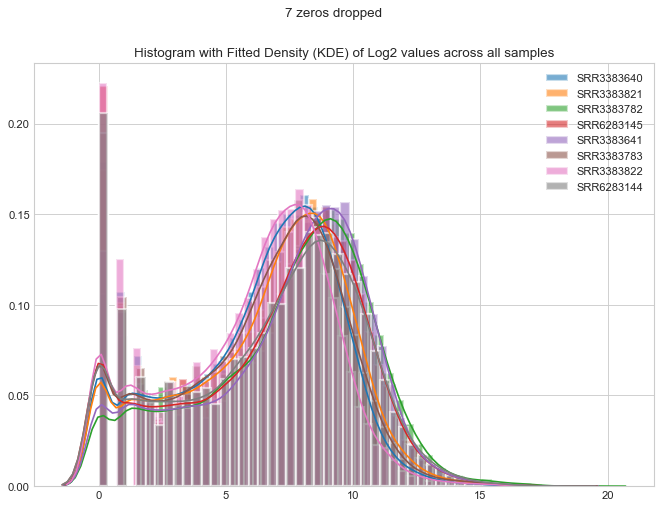

In [99]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("7 zeros dropped")
plt.legend();
plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");

### Addtional trimming of IDs  (drop 6 zeros across samples)

In [102]:
## Filter for looking rows with x number of ceros (second parse)
## Take the latest dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped7ceros.csv", sep='\t')
is_zero6 = (df_nozeros['zero-counter']>=6)     
#print(is_zero6)
df1_6 = df_nozeros[is_zero6]
print(" Match records: "+ str(df1_6.shape))
#print(df1_6)
## Send the integrated matrix 
df1_6.to_csv('all_log2_6_ceros.csv', sep='\t', index=True)

 Match records: (610, 12)


In [103]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_6['Genes'])

with open("all_genesIDs_6cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_6.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped6ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (21477, 12)
New dimensions:  (20867, 12)


### Plot again to see the new distribution

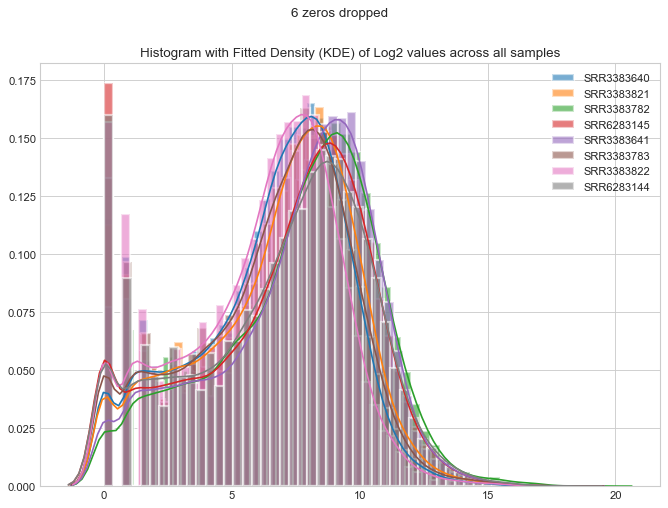

In [104]:
#Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("6 zeros dropped")
plt.legend();
plt.savefig("../athal1_stats/all_fitted density_drop6zeros.png");

In [105]:
## Another round dropping 5
df_nozeros=pd.read_csv("all_log2_dropped6ceros.csv", sep='\t')
is_zero5 = (df_nozeros['zero-counter']>=5)     
#print(is_zero5)
df1_5 = df_nozeros[is_zero5]
print("Match records: "+ str(df1_5.shape))
## Send to file 
df1_5.to_csv('all_log2_5_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_5['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_5cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_5.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped5ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

 Match records: (472, 13)
Current dimensions:  (20867, 13)
New dimensions:  (20395, 13)


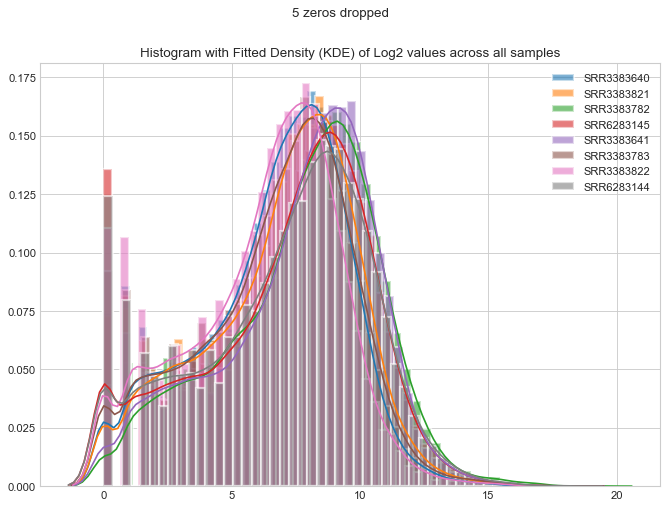

In [106]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("5 zeros dropped")
plt.legend();
plt.savefig("../athal1_stats/all_fitted density_drop5zeros.png");

In [107]:
## Another round dropping 4
df_nozeros=pd.read_csv("all_log2_dropped5ceros.csv", sep='\t')
is_zero4 = (df_nozeros['zero-counter']>=4)     
#print(is_zero4)
df1_4 = df_nozeros[is_zero4]
print("Match records: "+ str(df1_4.shape))
## Send to file 
df1_4.to_csv('all_log2_4_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_4['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_4cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_4.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped4ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (389, 14)
Current dimensions:  (20395, 14)
New dimensions:  (20006, 14)


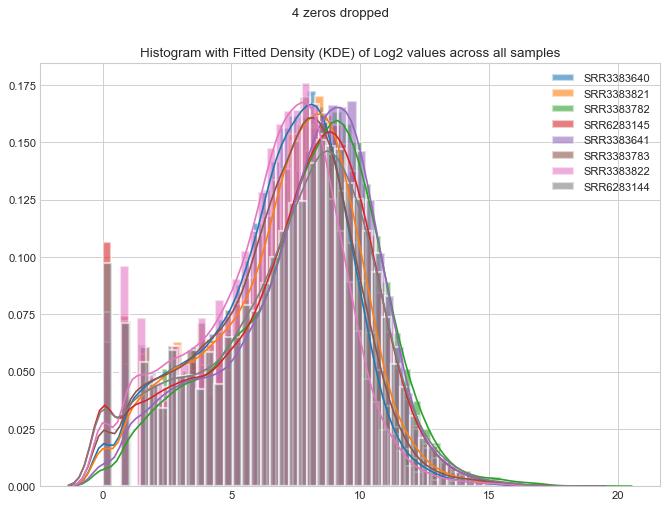

In [108]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("4 zeros dropped")
plt.legend();
plt.savefig("../athal1_stats/all_fitted density_drop4zeros.png");

In [109]:
## Another round dropping 3
df_nozeros=pd.read_csv("all_log2_dropped4ceros.csv", sep='\t')
is_zero3 = (df_nozeros['zero-counter']>=3)     
#print(is_zero3)
df1_3 = df_nozeros[is_zero3]
print("Match records: "+ str(df1_3.shape))
## Send to file 
df1_3.to_csv('all_log2_3_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_3['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_3cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_3.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped3ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (447, 15)
Current dimensions:  (20006, 15)
New dimensions:  (19559, 15)


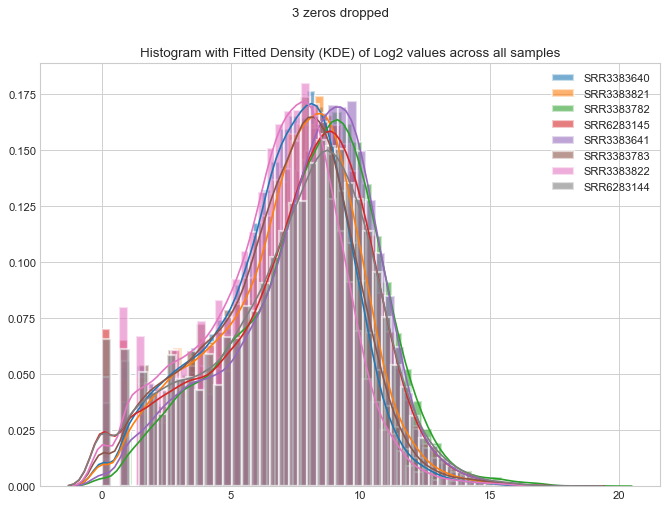

In [110]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("3 zeros dropped")
plt.legend();
plt.savefig("../athal1_stats/all_fitted density_drop3zeros.png");